In [0]:
from google.colab import files
uploaded = files.upload()

Saving availabilitytoronto.csv to availabilitytoronto (1).csv


In [0]:
#!pip install scikit-plot

In [0]:
#library imports
#import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import scipy.stats as stats
import descartes
from keras.models import Sequential
from scipy.stats import chisquare, chi2_contingency, chi2
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation
#from mpl_toolkits.basemap import Basemap
from keras.optimizers import SGD
#from hyperas import optim
#from hyperas.distributions import choice, uniform
import io
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
import scipy.stats as stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from keras import regularizers
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
#import keras_metrics
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#implementing Random forest
#Reading Data using pandas
dataf = pd.read_csv(io.BytesIO(uploaded['availabilitytoronto.csv']))
dataf = dataf.loc[:, ~dataf.columns.str.contains('^Unnamed')]
del dataf['availability_365']
del dataf['calculated_host_listings_count']
dataf.head()

,Availabilityclass,neighbourhood_Alderwood,neighbourhood_Amesbury,neighbourhood_Armour Heights,neighbourhood_Bayview,neighbourhood_Bayview Village,neighbourhood_Bedford Park,neighbourhood_Bendale,neighbourhood_Birch Cliff,neighbourhood_Broadview North,neighbourhood_Cabbagetown,neighbourhood_Casa Loma,neighbourhood_Cedarvale Humewood,neighbourhood_Clairlea,neighbourhood_Clanton Park,neighbourhood_Cliffcrest,neighbourhood_Cliffside,neighbourhood_Corktown,neighbourhood_Crescent Town,neighbourhood_Danforth Village,neighbourhood_Davisville,neighbourhood_Deer Park,neighbourhood_Don Mills,neighbourhood_Don Valley Village,neighbourhood_Dorset Park,neighbourhood_Dovercourt Park,neighbourhood_Downsview,neighbourhood_Downtown Toronto,neighbourhood_Dufferin Grove,neighbourhood_Eglinton East,neighbourhood_Entertainment District,neighbourhood_Eringate,neighbourhood_Etobicoke West Mall,neighbourhood_Fairbank,neighbourhood_Fashion District,neighbourhood_Financial District,neighbourhood_Flemingdon Park,neighbourhood_Forest Hill,neighbourhood_Garden District,neighbourhood_Glen Park,...,neighbourhood_Woodbine/Lumsden,neighbourhood_Wychwood Park,neighbourhood_Yonge Eglinton,neighbourhood_York University Heights,neighbourhood_Yorkville,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,accommodates,bathrooms,beds,price,date_diff,review_scores_rating,host_response_rate,minimum_nights,security_deposit,cleaning_fee,guests_included,maximum_nights,number_of_reviews,bedrooms,host_listings_count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.600000,0.375,0.411765,0.034932,0.267467,1.0000,0.95,0.002669,0.148965,0.18750,0.000000,3.394671e-07,0.009986,0.333333,0.005495
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.066667,0.125,0.058824,0.007523,0.451831,0.9625,0.00,0.159253,0.401162,0.07375,0.000000,1.695007e-07,0.241084,0.066667,0.010989
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.000000,0.125,0.058824,0.004990,0.133272,0.9250,0.95,0.000000,0.019961,0.03375,0.000000,4.190952e-09,0.000000,0.066667,0.005495
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.133333,0.125,0.058824,0.005437,1.000000,0.9375,1.00,0.000000,0.000000,0.00000,0.066667,1.257285e-08,0.298146,0.066667,0.010989
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.125,0.058824,0.004022,0.138196,0.9750,0.95,0.105872,0.049009,0.07375,0.066667,1.695007e-07,0.037090,0.000000,0.005495


In [0]:
#Diving the dataset into test and train
trainingSet, testSet = train_test_split(dataf, test_size=0.20, random_state = 21312)

testSet.shape
train_y = trainingSet[['Availabilityclass']].copy()
train_x = trainingSet.drop('Availabilityclass', 1)
test_y = testSet[['Availabilityclass']].copy()
test_x = testSet.drop('Availabilityclass', 1)

#train_y = keras.utils.to_categorical(train_y, num_classes=1, dtype='int64')
#test_y = keras.utils.to_categorical(test_y, num_classes=1, dtype='int64')
test_y.shape

(4061, 1)

Train on 14617 samples, validate on 1625 samples
Epoch 1/300
14617/14617 [==============================] - 1s 76us/step - loss: 0.8087 - acc: 0.7167 - val_loss: 0.6307 - val_acc: 0.7145
Epoch 2/300
14617/14617 [==============================] - 1s 45us/step - loss: 0.6076 - acc: 0.7181 - val_loss: 0.6042 - val_acc: 0.7145
Epoch 3/300
14617/14617 [==============================] - 1s 44us/step - loss: 0.5912 - acc: 0.7181 - val_loss: 0.5932 - val_acc: 0.7145
Epoch 4/300
14617/14617 [==============================] - 1s 46us/step - loss: 0.5872 - acc: 0.7181 - val_loss: 0.5906 - val_acc: 0.7145
Epoch 5/300
14617/14617 [==============================] - 1s 47us/step - loss: 0.5827 - acc: 0.7181 - val_loss: 0.5882 - val_acc: 0.7145
Epoch 6/300
14617/14617 [==============================] - 1s 47us/step - loss: 0.5810 - acc: 0.7181 - val_loss: 0.5868 - val_acc: 0.7145
Epoch 7/300
14617/14617 [==============================] - 1s 45us/step - loss: 0.5802 - acc: 0.7181 - val_loss: 0.5853 - v

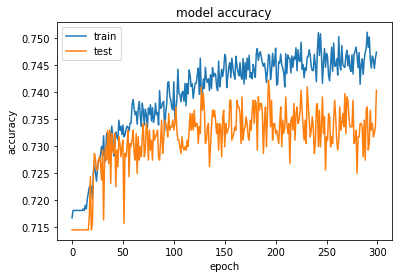

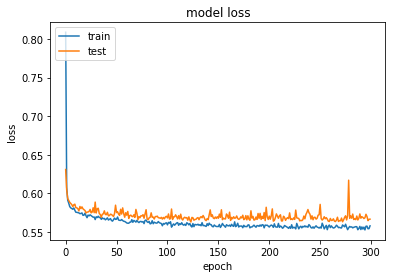

16242/16242 [==============================] - 1s 44us/step


In [0]:
#Building Artifcial Nerual Network
classifier = Sequential()
#First input Layer
classifier.add(Dense(300, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.002), input_dim=168))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.002)))
classifier.add(Dropout(0.5))

classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.002)))
classifier.add(Dropout(0.5))




#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer = 'adam',
                   loss='binary_crossentropy',
                   metrics =['accuracy'])

#Fitting the data to the training dataset
history = classifier.fit(train_x,train_y, batch_size=100, epochs=300, validation_split=0.10)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

eval_model=classifier.evaluate(train_x,train_y)
eval_model

y_pred=classifier.predict(test_x)
y_pred1 =(y_pred>0.5)

#evaluateion

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(test_y, y_pred)
#print(cm)

In [0]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)
print(cm)
#73.2 accuracy in the test set

[[2687  185]
 [ 921  268]]


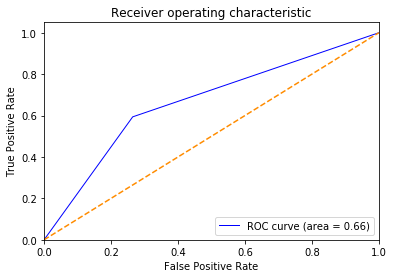

In [0]:
y_pred1 = y_pred1.astype(int)
y_pred1 = pd.DataFrame(y_pred1)
y_pred1.head()
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred1, test_y)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy of logistic regression classifier on test set: 0.73
[[2713  159]
 [ 951  238]]


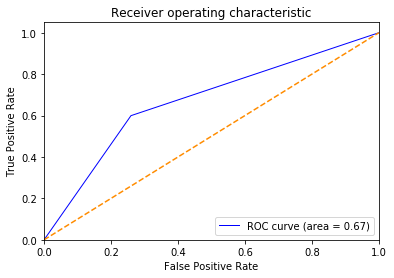

In [0]:
#implementing logistic regression
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
print(cm)
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_y, test_y)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

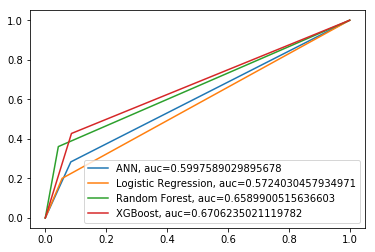

In [0]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_y, y_pred1)
auc = metrics.roc_auc_score(test_y, y_pred1)
plt.plot(fpr,tpr,label="ANN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_y, pred_y)
auc = metrics.roc_auc_score(test_y, pred_y)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_y, predo)
auc = metrics.roc_auc_score(test_y, predo)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_y, pred2)
auc = metrics.roc_auc_score(test_y, pred2)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))

plt.legend(loc=0)

In [0]:
#Random Forest

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x,train_y)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(test_x, test_y)))
predo=clf.predict(test_x)
cm1 = confusion_matrix(test_y, predo)
print(cm1)

Accuracy of logistic regression classifier on test set: 0.78
[[2749  123]
 [ 760  429]]


In [0]:
import xgboost as xgb
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(train_x, train_y)
train_model2 = model2.fit(train_x, train_y)
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(test_x)
pred2 = train_model2.predict(test_x)

print('Model 1 XGboost Report %r' % (classification_report(test_y, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(test_y, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.77      0.93      0.84      2872\n           1       0.66      0.31      0.42      1189\n\n    accuracy                           0.75      4061\n   macro avg       0.71      0.62      0.63      4061\nweighted avg       0.73      0.75      0.72      4061\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.79      0.91      0.85      2872\n           1       0.67      0.43      0.52      1189\n\n    accuracy                           0.77      4061\n   macro avg       0.73      0.67      0.69      4061\nweighted avg       0.76      0.77      0.75      4061\n'


In [0]:
cm2 = confusion_matrix(test_y, pred2)
print(cm2)

[[2625  247]
 [ 681  508]]


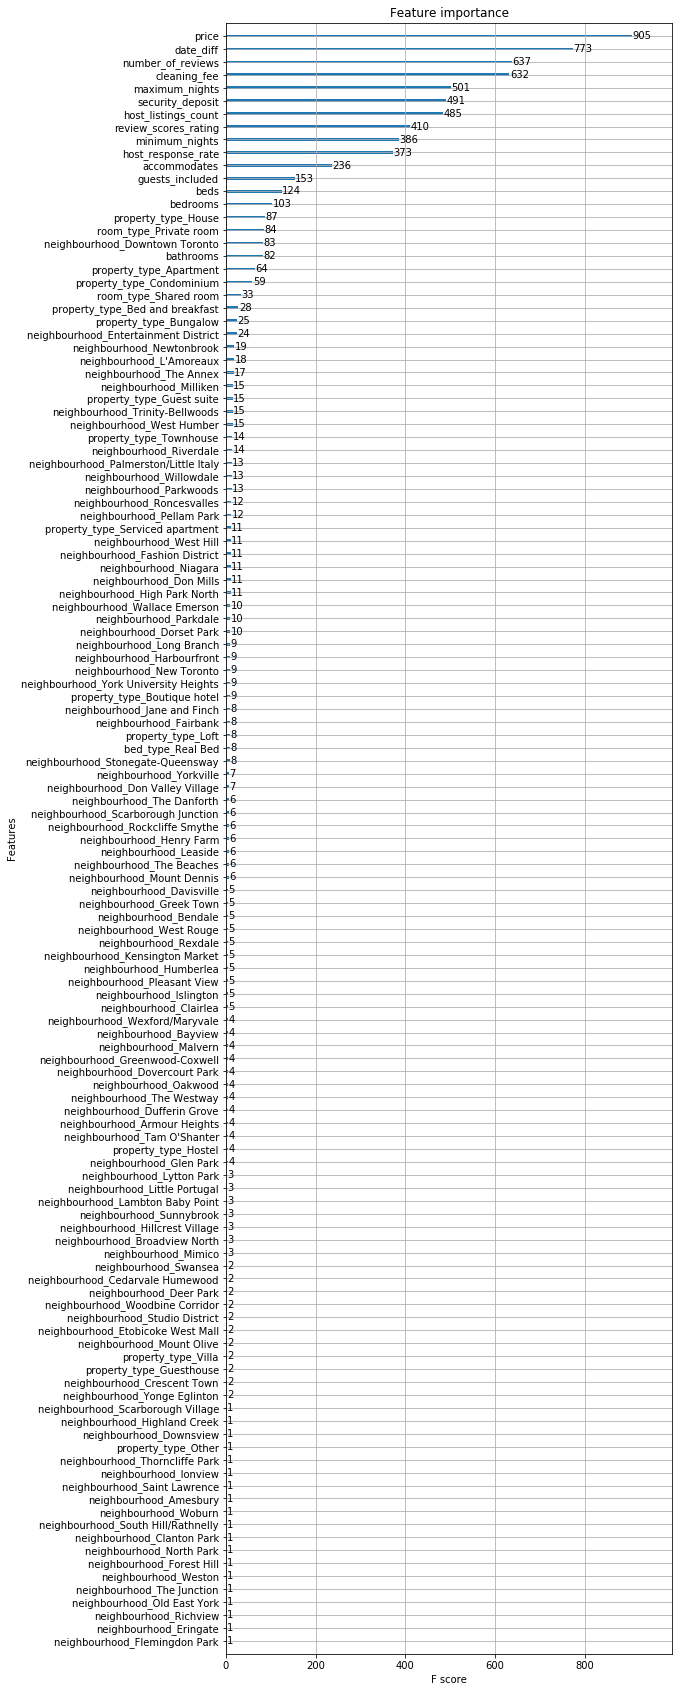

In [0]:
from xgboost import plot_importance
c = plot_importance(train_model2, )
fig = c.figure
fig.set_size_inches(8, 30)